## This program gives the fitted parameter for the energy response
## It gives mean, std, leakage and resolution also e/h


In [1]:
#%matplotlib notebook
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import mplhep as hep
from __future__ import print_function
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.legend_handler import HandlerLine2D
#from scipy.stats import norm
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
from scipy import integrate
import mplhep as hep
hep.set_style(hep.style.CMS)
size_xlabels=30
params = {'legend.fontsize': '20',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':size_xlabels,
         'ytick.labelsize':size_xlabels,
         'axes.labelsize': size_xlabels,
         'axes.titlesize': size_xlabels}
#plt.rc_params[axis='y', which='both')
plt.style.use(hep.style.CMS)
plt.rcParams.update(params)

tick_size_major=4
tick_size_minor=2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = tick_size_major
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = tick_size_minor


plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = tick_size_major
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = tick_size_minor


plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

#ax1.tick_params('both', length=20, width=2, which='major')
#ax1.tick_params('both', length=10, width=1, which='minor')

/tmp/ipykernel_698965/3497175128.py:19: FutureWarning: ``set_style`` is deprecated: Naming convention is changing to match mpl. Use ``mplhep.style.use()``.
  hep.set_style(hep.style.CMS)


## Some of input parameters
### 1) Input path file
### 2) Energy and time threshold 
### 3) Fitting range

In [2]:
import plots
## ANALYZING THE INSERT WITH TUNGSTEN + STEEL DATA
FilePathReco="/Users/bishnukarki/EIC/EIC/HCAL_Insert_Sim_Files/Data/FTFP_BERT_HP/"
#FilePathReco="/home/bishnu/EIC/Data/hepmc/HCAL/"
#FilePathReco="/home/bishnu/Trail/"
## PATH WHERE FIGURE ARE SAVED  
PathToPlot='"/Users/bishnukarki/EIC/Plots/'        
Time_Threshold=50 #ns

MIP=0.6 # MeV for Hcal insert 
Gev_To_MeV=1000
Sigma_For_leakage=3
Energy_Threshold=0.1*MIP  #(0.5 * MIP for calice analysis)
FIT_SIGMA=3


## For resolution and leakage for constant rapidity as function of Energy
## Parameter 'On' gives fitted parameter with weighted sum of HCAL + HCAL Insert
## Parameter 'OFF' , gives with simple sum of HCAL + HCAL Insert

deg_10W_40Fe
HELLO JELLO 1500


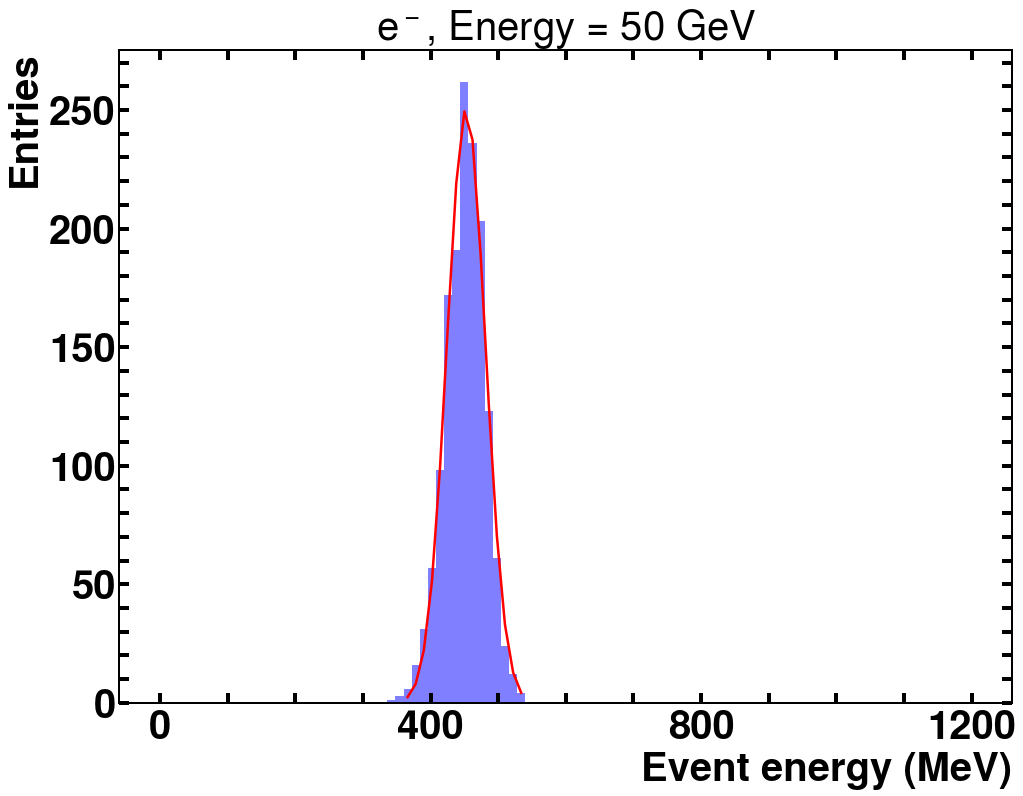

e_means_10W_40Fe=[452.69 ]
e_means_error_10W_40Fe=[0.914 ]
e_stds_10W_40Fe=[ 28.44 ]
e_stds_error_10W_40Fe=[ 0.915 ]
e_leaks_per_10W_40Fe=[ 0.667 ]
e_leaks_per_error_10W_40Fe=[ 0.2115 ]
e_resolutions_10W_40Fe=[ 0.06283 ]
e_resolutions_errors_10W_40Fe=[ 0.0020 ]


In [4]:
## FILE WITH CONSTANT ETA AND DIFFERENT ENERGY (FE + W MIXTURE )
FilePathReco="/Users/bishnukarki/EIC/EIC/HCAL_Insert_Sim_Files/Data/FTFP_BERT_HP/"

theta=2.83
def get_fitted_mean_std(wt='on'):
      
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    fraction=1 #(1/10 of event is selected)
    
    #fileindex="deg_Fe-W" ## for insert file or HCAL orginal file
    extension='10W_40Fe'
    fileindex='deg_'+'{0}'.format(extension)
    print(fileindex)
    
    #fileindex="deg_Fe-W_Sc35_Ab156" ## for insert with absorber 15.6 mm and Sc = 0.35 mm
    #fileindex="deg_Fe-W" ## for insert WITH W 30 LAYER AND FE 20 LAYERS
    if fileindex=='deg_20W_30Fe':
        prefix='W'
    elif fileindex=='deg_Fe-W':
        prefix='FeW'
   
    ## CHOOSE THE ENERGY
    energies=[50]#,20,30,50,60,80]
    
    ## CHOOSE THE PARTICLE 
    particle='e-'
        
    for ienergy in energies:
             
        ## FOR THE HCAL Insert reading
        ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
        phi_wFe,ene_good_wFe=plots.read_rootfile_HCAL_Insert(fileindex,fraction,FilePathReco,ienergy,theta,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        ## THIS IS ONLY FOR THE RESOLUTION OF THE HCAL INSERT
        
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error,\
        pi_resolution,pi_resolution_error=plots.get_resolution(ene_good_wFe, ienergy, particle, Sigma_For_leakage)  
        
        '''
        ## READ HCAL 
        ene_wFe_h,time_wFe_h,PosRecoX_wFe_h,PosRecoY_wFe_h,PosRecoZ_wFe_h,mass_wFe_h,mom_wFe_h,energy_gen_wFe_h, \
        phi_wFe_h,ene_good_wFe_h=plots.read_rootfile_HCAL(fileindex,fraction,FilePathReco,ienergy,theta,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        ## RESOLUTION HCAL + HCAL INSERT
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error, pi_resolution,\
        pi_resolution_error=plots.get_resolution_hcalall_weighted(wt,ene_good_wFe_h,ene_good_wFe, ienergy, \
                                                         particle,Sigma_For_leakage) 
        '''
        
        pi_means.append(pi_mean)
        pi_stds.append(pi_std)
        pi_means_error.append(pi_mean_error)
        pi_stds_error.append(pi_sigma_error)
        pi_resolutions.append(pi_resolution)
        pi_resolution_errors.append(pi_resolution_error)
        pi_leaks_per.append(pi_leak_per)
        pi_leaks_per_error.append(pi_leak_per_error)
        
    plots.print_decimal_pi_update('{0}'.format(extension), particle, pi_means,  pi_means_error,  pi_stds,pi_stds_error, pi_leaks_per, \
                         pi_leaks_per_error, pi_resolutions, pi_resolution_errors)     
### WT ON IS FOR THE WEIGHTED SUM OF HCAL AND HCAL INSERT
get_fitted_mean_std('on')  


## Study the leakage with $\eta$ and Constant E of 50 GeV
## Parameter 'On' gives fitted parameter with weighted sum of HCAL + HCAL Insert
## Parameter 'OFF' , gives with simple sum of HCAL + HCAL Insert

In [3]:
## FILE WITH CONSTANT ENERGY AND DIFFERENT ETA
FilePathReco="/Users/bishnukarki/EIC/EIC/HCAL_Insert_Sim_Files/Data/FTFP_BERT_HP/eta/"

def get_fitted_mean_std(wt='on'):
   
    pi_means=[]
    pi_stds=[]
    pi_resolutions=[]
    pi_resolution_errors=[]
    pi_means_error=[]
    pi_stds_error=[]
    pi_leaks_per=[]
    pi_leaks_per_error=[]
    
    el_means=[]
    el_stds=[]
    el_resolutions=[]
    el_resolution_errors=[]
    el_means_error=[]
    el_stds_error=[]
    el_leaks_per=[]
    el_leaks_per_error=[]
    
    ## fraction 1 = total events in analysis, =>  10 means Total/10 events in analysis 
    fraction=1 #(1/10 of event is selected)
    
     
    #fileindex="deg" ## for insert file or HCAL orginal file
    fileindex="deg_Fe-W" ## for insert WITH W 30 LAYER AND FE 20 LAYERS
    if fileindex=='deg':
        prefix='W'
    elif fileindex=='deg_Fe-W':
        prefix='FeW'
        
    ## Energies 
    energies=50 
   
    thetas=[2.25, 2.32, 2.56, 2.83, 3.13, 3.46, 3.82, 4.23]
    
    ## particle
    particle='pi-'
    for ithetas in thetas:
        
        
        
        ## FOR THE HCAL Insert reading
        ene_wFe,time_wFe,PosRecoX_wFe,PosRecoY_wFe,PosRecoZ_wFe,mass_wFe,mom_wFe,energy_gen_wFe, \
        phi_wFe,ene_good_wFe=plots.read_rootfile_HCAL_Insert(fileindex,fraction,FilePathReco,energies,ithetas,particle,\
                                                         Time_Threshold,Energy_Threshold)
        
        ## READ HCAL 
        ene_wFe_h,time_wFe_h,PosRecoX_wFe_h,PosRecoY_wFe_h,PosRecoZ_wFe_h,mass_wFe_h,mom_wFe_h,energy_gen_wFe_h, \
        phi_wFe_h,ene_good_wFe_h=plots.read_rootfile_HCAL(fileindex,fraction,FilePathReco,energies,ithetas,particle,\
                                                         Time_Threshold,Energy_Threshold)
       
         ## RESOLUTION HCAL + HCAL INSERT with weighted sum
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error, pi_resolution,\
        pi_resolution_error=plots.get_resolution_hcalall_weighted(wt, ene_good_wFe_h,ene_good_wFe, ithetas, \
                                                         particle,Sigma_For_leakage) 
        
        
        
        ''' 
             
        pi_mean, pi_std, pi_mean_error, pi_sigma_error, pi_leak_per, pi_leak_per_error,\
        pi_resolution,pi_resolution_error=plots.get_resolution(ene_good_wFe, ithetas, particle, Sigma_For_leakage)  
        '''
        
        
        
        
        pi_means.append(pi_mean)
        pi_stds.append(pi_std)
        pi_means_error.append(pi_mean_error)
        pi_stds_error.append(pi_sigma_error)
        pi_resolutions.append(pi_resolution)
        pi_resolution_errors.append(pi_resolution_error)
        pi_leaks_per.append(pi_leak_per)
        pi_leaks_per_error.append(pi_leak_per_error)
        
    plots.print_decimal_pi_update('thetas_wt_sum', particle, pi_means,  pi_means_error,  pi_stds,pi_stds_error, pi_leaks_per, \
                           pi_leaks_per_error, pi_resolutions, pi_resolution_errors)     
get_fitted_mean_std('on') 

FileNotFoundError: file not found

    '/home/bishnu/EIC/Data/hepmc/HCAL/FTFP_BERT_HP/eta/insert_reco_pi-_50GeV_theta_2.25deg_Fe-W.edm4hep.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


##  Just for plotting the Gaussian distribuiton with different absorber layers combinations

HELLO JELLO 1500
HELLO JELLO 1000
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 5000
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1000
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500


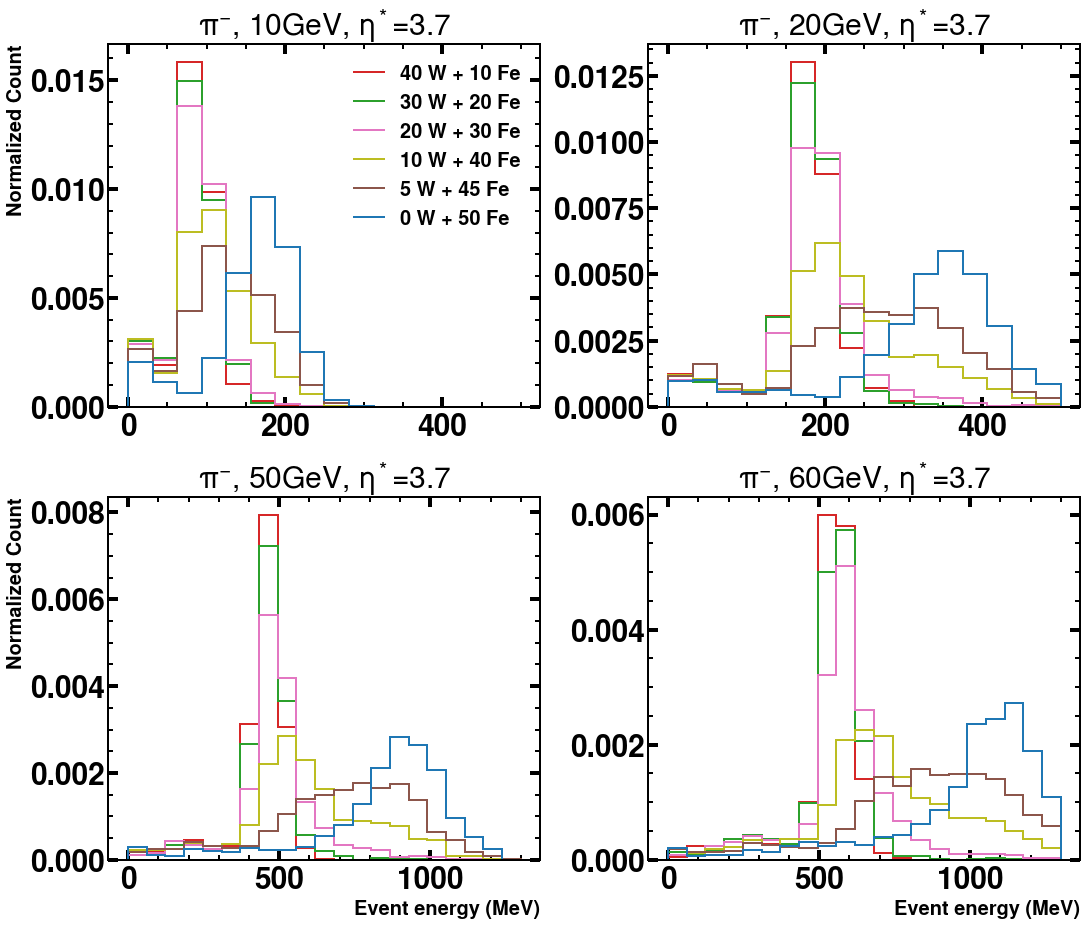

In [37]:
absorber_layers=["20W_34Fe","25W_29Fe","30W_24Fe","40W_14Fe"]
index=2
fileindex=f"deg_Athena_{absorber_layers[index]}"
    
FilePathReco="/Users/bishnukarki/EIC/HCAL_Insert_Sim_Files/FTFP_BERT_HP/"
theta=2.83
eta=plots.get_eta(theta)

from matplotlib.lines import Line2D
def get_fitted_mean_std():
   
    fraction=1
    energies=[10,20,50,60]
    #energies=[30] #,20,30,40,50,60,80,100]
    bin_width=10
    #max_range=1200
    
    particle='pi-'
    greek_particle=plots.get_greek_particle(particle) 
    
    
    extensions=['40W_10Fe', '30W_20Fe', '20W_30Fe','10W_40Fe','5W_45Fe', '0W_50Fe']
    Name_leg=['40 W + 10 Fe', '30 W + 20 Fe', '20 W + 30 Fe', '10 W + 40 Fe','5 W + 45 Fe','0 W + 50 Fe']
    colors=['C3','C2','C6', 'C8','C5','C0','C9']
    #fileindex='deg_'+'{0}'.format(extension)
    nrows=2
    ncols=2
    fig,ax = plt.subplots(nrows,ncols,figsize=(15,15))#,sharex=True, sharey=True)
    plt.subplots_adjust(left=0.0,  wspace=0.25, hspace=0.25)
    
    
    for ienergy in energies:
        iE=energies.index(ienergy)
        if ienergy<30:
            max_range=500
            bin_width=30
        else:
            max_range=1300
            bin_width=60
        if iE<nrows:
            irow=0
            icol=iE
        else:
            irow=1
            icol=iE-ncols
            
        nbins=int (max_range/bin_width)
        for extension in extensions:
            if (extension=='30W_20Fe') and (theta==2.83):
                fileindex='deg'
            else:
                fileindex='deg_'+'{0}'.format(extension)
            index = extensions.index(extension)
            #print(index)
            ## FOR THE HCAL Insert mixture W-Fe
            ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile_HCAL_Insert\
            (fileindex,fraction,FilePathReco,ienergy,theta,particle,Time_Threshold,Energy_Threshold)


            ene_total = ak.sum(ene_good,axis=-1)

            count, bins,_= ax[irow][icol].hist(np.array(ene_total),bins=nbins,alpha=1.0,range=(0,max_range),\
            label=Name_leg[index],linewidth='2',color=colors[index], histtype='step', density=True)
            binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
            ax[1][icol].set_xlabel("Event energy (MeV)",fontsize=20)
            ax[irow][0].set_ylabel("Normalized Count",fontsize=20)
            ax[irow][icol].set_title("{0}, {1}GeV, $\eta^*$={2:.1f}".format(greek_particle,ienergy,eta))

            # Create new legend handles but use the colors from the existing ones
            handles, labels = ax[0][0].get_legend_handles_labels()
            new_handles = [Line2D([], [], c=h.get_edgecolor(), linewidth=2) for h in handles] 
            
            ax[0][0].legend(handles=new_handles, labels=labels)            
      
    plt.show()     
        
get_fitted_mean_std()   


## Plot the energy of distribution for single energy with different layers

HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500


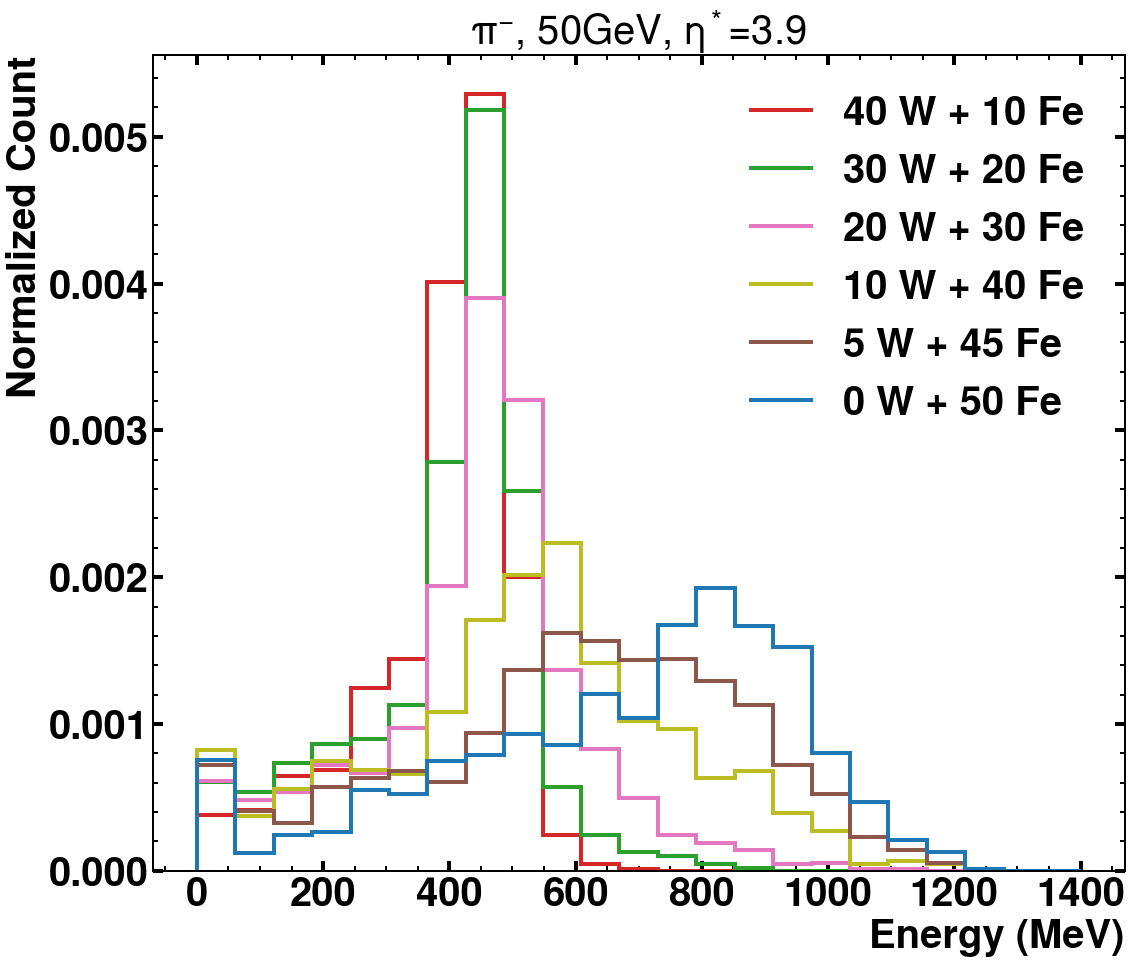

In [31]:
FilePathReco="/Users/bishnukarki/EIC/HCAL_Insert_Sim_Files/FTFP_BERT_HP/"
theta=2.32
eta=plots.get_eta(theta)
from matplotlib.lines import Line2D
def get_fitted_mean_std():
   
    fraction=1 
    energies=[50]
    #energies=[30] #,20,30,40,50,60,80,100]

    #max_range=1200
    
    particle='pi-'
    greek_particle=plots.get_greek_particle(particle) 
    
    extensions=['40W_10Fe', '30W_20Fe', '20W_30Fe','10W_40Fe','5W_45Fe', '0W_50Fe']
    Name_leg=['40 W + 10 Fe', '30 W + 20 Fe', '20 W + 30 Fe', '10 W + 40 Fe','5 W + 45 Fe','0 W + 50 Fe']
    colors=['C3','C2','C6', 'C8','C5','C0','C9']
    #fileindex='deg_'+'{0}'.format(extension)
    nrows=1
    ncols=1
    fig,ax = plt.subplots(nrows,ncols,figsize=(15,15))#,sharex=True, sharey=True)
    plt.subplots_adjust(left=0.0,  wspace=0.3, hspace=0.3)
    
    
    for ienergy in energies:
        iE=energies.index(ienergy)
        if ienergy<30:
            max_range=500
            bin_width=60
        else:
            max_range=1400
            bin_width=60
        if iE<nrows:
            irow=0
            icol=iE
        else:
            irow=1
            icol=iE-ncols
        for extension in extensions:
            if (extension=='30W_20Fe') and (theta==2.83):
                fileindex='deg'
            else:
                fileindex='deg_'+'{0}'.format(extension)
            
            nbins=int (max_range/bin_width)
            index = extensions.index(extension)
            #print(index)
            ## FOR THE HCAL Insert mixture W-Fe
            ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile_HCAL_Insert\
            (fileindex,fraction,FilePathReco,ienergy,theta,particle,Time_Threshold,Energy_Threshold)


            ene_total = ak.sum(ene_good,axis=-1)

            count, bins,_= ax.hist(np.array(ene_total),bins=nbins,alpha=1.0,range=(0,max_range),\
            label=Name_leg[index],linewidth='4',color=colors[index], histtype='step', density=True)
            binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
            ax.set_xlabel("Energy (MeV)",fontsize=40)
            ax.set_ylabel("Normalized Count",fontsize=40)
            ax.set_title("{0}, {1}GeV, $\eta^*$={2:.1f}".format(greek_particle,ienergy,eta), fontsize=40)

            # Create new legend handles but use the colors from the existing ones
            handles, labels = ax.get_legend_handles_labels()
            new_handles = [Line2D([], [], c=h.get_edgecolor(), linewidth=4) for h in handles] 
            
            ax.legend(handles=new_handles, labels=labels,fontsize=40)            
      
    plt.show()     
        
get_fitted_mean_std()   

## Energy vs Z

HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500
HELLO JELLO 1500


<Figure size 1080x720 with 0 Axes>

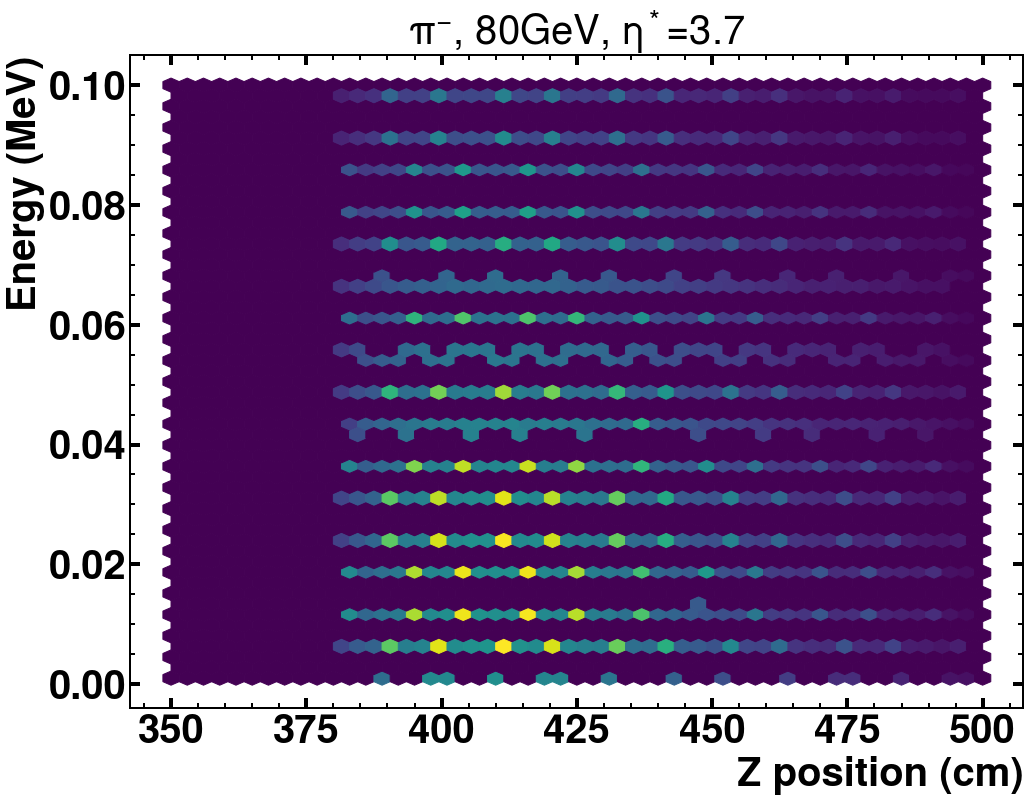

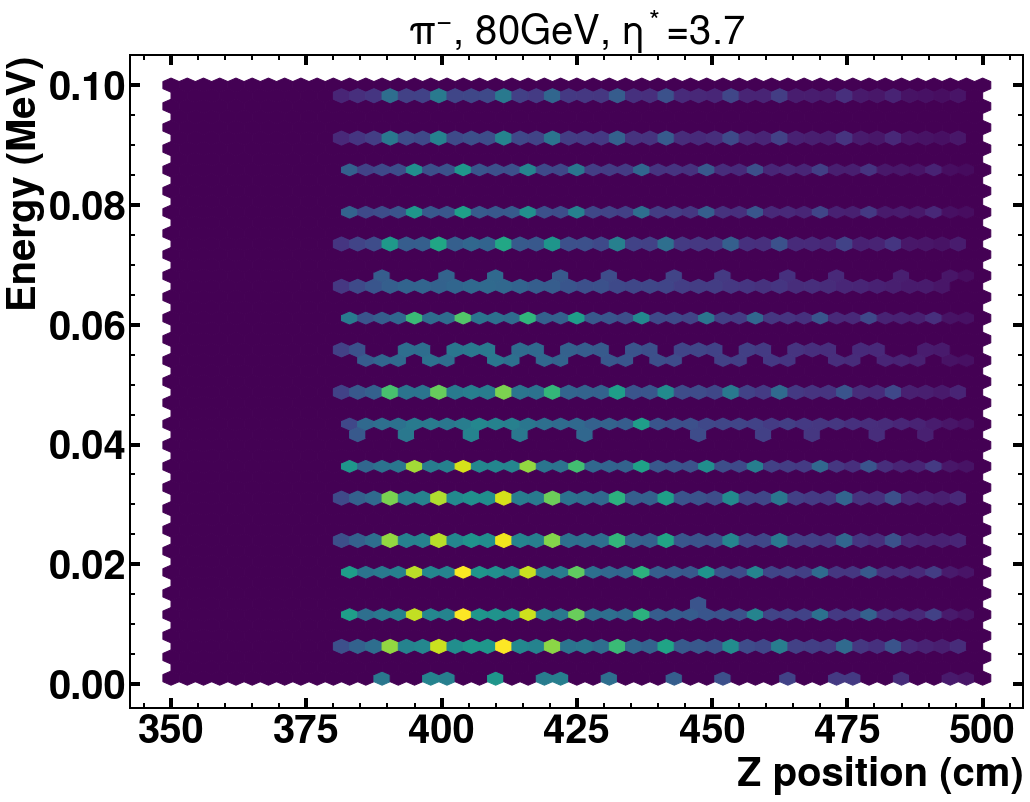

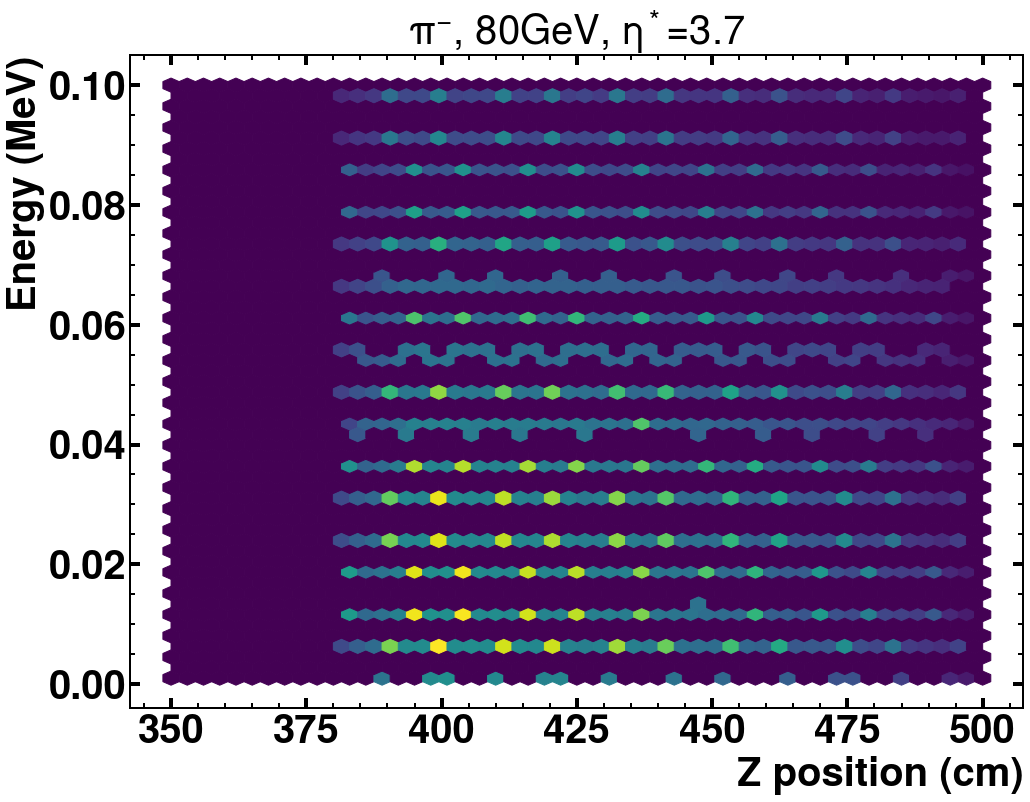

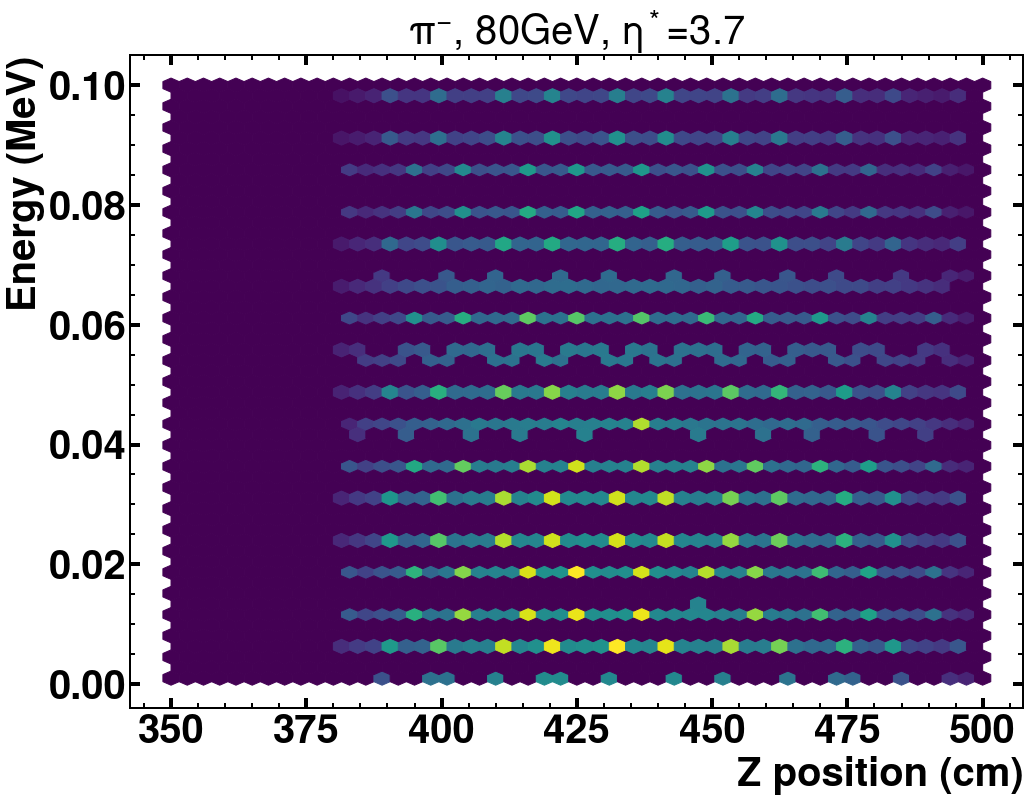

In [26]:
FilePathReco="/Users/bishnukarki/EIC/HCAL_Insert_Sim_Files/FTFP_BERT_HP/"
theta=2.83
eta=plots.get_eta(theta)
from matplotlib.lines import Line2D
def get_fitted_mean_std():
   
    fraction=1 
    energies=[80]
    #energies=[30] #,20,30,40,50,60,80,100]
    nbins=50
    #max_range=1200
    
    particle='pi-'
    greek_particle=plots.get_greek_particle(particle) 
    
    extensions=['40W_10Fe','10W_40Fe','5W_45Fe','0W_50Fe']#, '30W_20Fe', '20W_30Fe','10W_40Fe','5W_45Fe', '0W_50Fe']
    Name_leg=['40 W + 10 Fe', '10 W + 40 Fe','5 W + 45 Fe','0W + 50 Fe']#, '30 W + 20 Fe', '20 W + 30 Fe', '10 W + 40 Fe','5 W + 45 Fe','0 W + 50 Fe']
    colors=['C3','C2']#,'C6', 'C8','C5','C0','C9']
    #fileindex='deg_'+'{0}'.format(extension)
    nrows=1
    ncols=1
    #fig,ax = plt.subplots(nrows,ncols,figsize=(15,15))#,sharex=True, sharey=True)
    plt.subplots_adjust(left=0.0,  wspace=0.3, hspace=0.3)
    
    
    for ienergy in energies:
        iE=energies.index(ienergy)
        if ienergy<30:
            max_range=500
            bin_width=30
        else:
            max_range=1200
            bin_width=30
        if iE<nrows:
            irow=0
            icol=iE
        else:
            irow=1
            icol=iE-ncols
        for extension in extensions:
            if (extension=='30W_20Fe') and (theta==2.83):
                fileindex='deg'
            else:
                fileindex='deg_'+'{0}'.format(extension)
            index = extensions.index(extension)
            #print(index)
            ## FOR THE HCAL Insert mixture W-Fe
            ene,time,PosRecoX,PosRecoY,PosRecoZ,mass,mom,energy_gen,phi,ene_good=plots.read_rootfile_HCAL_Insert\
            (fileindex,fraction,FilePathReco,ienergy,theta,particle,Time_Threshold,Energy_Threshold)


            ene_total = ak.sum(ene_good,axis=-1)
            
            
            fig,ax = plt.subplots(1,1, figsize=(16, 12),sharex=True,sharey=True)
    #hb=ax.hexbin(ak.flatten(PosRecoX),ak.flatten(PosRecoY),gridsize=50, cmap='viridis')                                       
            hb=ax.hexbin(ak.flatten(PosRecoZ),ak.flatten(ene),gridsize=50, extent=(350,500,0.001,0.1))
            
            

           
            ax.set_xlabel("Z position (cm)",fontsize=40)
            ax.set_ylabel("Energy (MeV)",fontsize=40)
            ax.set_title("{0}, {1}GeV, $\eta^*$={2:.1f}".format(greek_particle,ienergy,eta), fontsize=40)

                   
      
    plt.show()     
        
get_fitted_mean_std()   